## Your Name Here

Student Name: Aly Hussein

Student ID: 40167083

Totoal Points 100.

## Practice loading in data
Using the file flights.csv load it into a pandas data frame

In [335]:
import pandas as pd
import numpy as np
import pandasql as psql
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [336]:
load = pd.read_csv('load_frcstd_hist.csv')
lmp = pd.read_csv('rt_hrl_lmps.csv')
solar = pd.read_csv('hourly_solar_power_forecast.csv')
wind = pd.read_csv('hourly_wind_power_forecast.csv')

In [337]:
load.isnull().sum()

evaluated_at_utc               0
evaluated_at_ept               0
forecast_hour_beginning_utc    0
forecast_hour_beginning_ept    0
forecast_area                  0
forecast_load_mw               0
dtype: int64

In [338]:
lmp.isnull().sum()

datetime_beginning_utc        0
datetime_beginning_ept        0
pnode_id                      0
pnode_name                    0
voltage                   16464
equipment                 23079
type                          0
zone                      16121
system_energy_price_rt        0
total_lmp_rt                  0
congestion_price_rt           0
marginal_loss_price_rt        0
row_is_current                0
version_nbr                   0
dtype: int64

In [339]:
wind.isnull().sum()

evaluated_at_utc          0
evaluated_at_ept          0
datetime_beginning_utc    0
datetime_beginning_ept    0
datetime_ending_utc       0
datetime_ending_ept       0
wind_forecast_mwh         0
dtype: int64

In [340]:
solar.isnull().sum()





evaluated_at_utc          0
evaluated_at_ept          0
datetime_beginning_utc    0
datetime_beginning_ept    0
datetime_ending_utc       0
datetime_ending_ept       0
solar_forecast_mwh        0
solar_forecast_btm_mwh    0
dtype: int64

In [341]:
# Convert `evaluated_at_ept` and `datetime_beginning_ept` to datetime format for sorting and filtering
wind['evaluated_at_ept'] = pd.to_datetime(wind['evaluated_at_ept'])
wind['datetime_beginning_ept'] = pd.to_datetime(wind['datetime_beginning_ept'])

# Sort by `datetime_beginning_ept` and `evaluated_at_ept` to ensure latest evaluations are at the top for each group
wind_sorted = wind.sort_values(by=['datetime_beginning_ept', 'evaluated_at_ept'], ascending=[True, False])

# Drop duplicates to keep only the latest `evaluated_at_ept` for each `datetime_beginning_ept`
wind_latest_forecasts = wind_sorted.drop_duplicates(subset='datetime_beginning_ept', keep='first')

wind_latest_forecasts


C:\Users\sdwor\AppData\Local\Temp\ipykernel_7852\1828250434.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind['evaluated_at_ept'] = pd.to_datetime(wind['evaluated_at_ept'])


,evaluated_at_utc,evaluated_at_ept,datetime_beginning_utc,datetime_beginning_ept,datetime_ending_utc,datetime_ending_ept,wind_forecast_mwh
7084,10/5/2024 12:00:00 AM,2024-10-04 20:00:00,10/5/2024 5:00:00 AM,2024-10-05 01:00:00,10/5/2024 6:00:00 AM,10/5/2024 2:00:00 AM,3056.959
6831,10/5/2024 1:00:00 AM,2024-10-04 21:00:00,10/5/2024 6:00:00 AM,2024-10-05 02:00:00,10/5/2024 7:00:00 AM,10/5/2024 3:00:00 AM,3061.729
6578,10/5/2024 2:00:00 AM,2024-10-04 22:00:00,10/5/2024 7:00:00 AM,2024-10-05 03:00:00,10/5/2024 8:00:00 AM,10/5/2024 4:00:00 AM,3077.619
6325,10/5/2024 3:00:00 AM,2024-10-04 23:00:00,10/5/2024 8:00:00 AM,2024-10-05 04:00:00,10/5/2024 9:00:00 AM,10/5/2024 5:00:00 AM,3273.259
6072,10/5/2024 4:00:00 AM,2024-10-05 00:00:00,10/5/2024 9:00:00 AM,2024-10-05 05:00:00,10/5/2024 10:00:00 AM,10/5/2024 6:00:00 AM,3415.707
...,...,...,...,...,...,...,...
38,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/7/2024 11:00:00 PM,2024-10-07 19:00:00,10/8/2024 12:00:00 AM,10/7/2024 8:00:00 PM,1414.632
39,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/8/2024 12:00:00 AM,2024-10-07 20:00:00,10/8/2024 1:00:00 AM,10/7/2024 9:00:00 PM,1460.294
40,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/8/2024 1:00:00 AM,2024-10-07 21:00:00,10/8/2024 2:00:00 AM,10/7/2024 10:00:00 PM,1450.346
41,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/8/2024 2:00:00 AM,2024-10-07 22:00:00,10/8/2024 3:00:00 AM,10/7/2024 11:00:00 PM,1340.781


In [342]:
# Convert `evaluated_at_ept` and `datetime_beginning_ept` to datetime format for sorting and filtering
solar['evaluated_at_ept'] = pd.to_datetime(solar['evaluated_at_ept'])
solar['datetime_beginning_ept'] = pd.to_datetime(solar['datetime_beginning_ept'])

# Sort by `datetime_beginning_ept` and `evaluated_at_ept` to ensure latest evaluations are at the top for each group
solar_sorted = solar.sort_values(by=['datetime_beginning_ept', 'evaluated_at_ept'], ascending=[True, False])

# Drop duplicates to keep only the latest `evaluated_at_ept` for each `datetime_beginning_ept`
solar_latest_forecasts = solar_sorted.drop_duplicates(subset='datetime_beginning_ept', keep='first')

solar_latest_forecasts

C:\Users\sdwor\AppData\Local\Temp\ipykernel_7852\2830439663.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solar['evaluated_at_ept'] = pd.to_datetime(solar['evaluated_at_ept'])
C:\Users\sdwor\AppData\Local\Temp\ipykernel_7852\2830439663.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solar['datetime_beginning_ept'] = pd.to_datetime(solar['datetime_beginning_ept'])


,evaluated_at_utc,evaluated_at_ept,datetime_beginning_utc,datetime_beginning_ept,datetime_ending_utc,datetime_ending_ept,solar_forecast_mwh,solar_forecast_btm_mwh
1344,10/5/2024 12:00:00 AM,2024-10-04 20:00:00,10/5/2024 12:00:00 AM,2024-10-04 20:00:00,10/5/2024 1:00:00 AM,10/4/2024 9:00:00 PM,0.021,0.0
1296,10/5/2024 1:00:00 AM,2024-10-04 21:00:00,10/5/2024 1:00:00 AM,2024-10-04 21:00:00,10/5/2024 2:00:00 AM,10/4/2024 10:00:00 PM,0.000,0.0
1248,10/5/2024 2:00:00 AM,2024-10-04 22:00:00,10/5/2024 2:00:00 AM,2024-10-04 22:00:00,10/5/2024 3:00:00 AM,10/4/2024 11:00:00 PM,0.000,0.0
1200,10/5/2024 3:00:00 AM,2024-10-04 23:00:00,10/5/2024 3:00:00 AM,2024-10-04 23:00:00,10/5/2024 4:00:00 AM,10/5/2024 12:00:00 AM,0.000,0.0
1152,10/5/2024 4:00:00 AM,2024-10-05 00:00:00,10/5/2024 4:00:00 AM,2024-10-05 00:00:00,10/5/2024 5:00:00 AM,10/5/2024 1:00:00 AM,0.000,0.0
...,...,...,...,...,...,...,...,...
43,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/7/2024 11:00:00 PM,2024-10-07 19:00:00,10/8/2024 12:00:00 AM,10/7/2024 8:00:00 PM,4.368,0.0
44,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/8/2024 12:00:00 AM,2024-10-07 20:00:00,10/8/2024 1:00:00 AM,10/7/2024 9:00:00 PM,0.008,0.0
45,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/8/2024 1:00:00 AM,2024-10-07 21:00:00,10/8/2024 2:00:00 AM,10/7/2024 10:00:00 PM,0.000,0.0
46,10/6/2024 4:00:00 AM,2024-10-06 00:00:00,10/8/2024 2:00:00 AM,2024-10-07 22:00:00,10/8/2024 3:00:00 AM,10/7/2024 11:00:00 PM,0.000,0.0


In [343]:
windXsolar = psql.sqldf( """SELECT W.datetime_beginning_ept, wind_forecast_mwh, solar_forecast_mwh
FROM wind_latest_forecasts AS W
JOIN solar_latest_forecasts AS S 
ON W.datetime_beginning_ept = S.datetime_beginning_ept
""")

windXsolar

,datetime_beginning_ept,wind_forecast_mwh,solar_forecast_mwh
0,2024-10-05 01:00:00.000000,3056.959,0.000
1,2024-10-05 02:00:00.000000,3061.729,0.000
2,2024-10-05 03:00:00.000000,3077.619,0.000
3,2024-10-05 04:00:00.000000,3273.259,0.000
4,2024-10-05 05:00:00.000000,3415.707,0.000
...,...,...,...
66,2024-10-07 19:00:00.000000,1414.632,4.368
67,2024-10-07 20:00:00.000000,1460.294,0.008
68,2024-10-07 21:00:00.000000,1450.346,0.000
69,2024-10-07 22:00:00.000000,1340.781,0.000


In [344]:
# Convert `evaluated_at_ept` and `datetime_beginning_ept` to datetime format for sorting and filtering
load['evaluated_at_ept'] = pd.to_datetime(load['evaluated_at_ept'])
load['forecast_hour_beginning_ept'] = pd.to_datetime(load['forecast_hour_beginning_ept'])

# Sort by `forecast_hour_beginning_ept` and `evaluated_at_ept` to ensure latest evaluations are at the top for each group
load_sorted = load.sort_values(by=['forecast_area','forecast_hour_beginning_ept', 'evaluated_at_ept'], ascending=[True,True, False])

# Drop duplicates to keep only the latest `evaluated_at_ept` for each `datetime_beginning_ept`
load_latest_forecasts = load_sorted.drop_duplicates(subset=['forecast_area', 'forecast_hour_beginning_ept'], keep='first')

load_latest_forecasts

C:\Users\sdwor\AppData\Local\Temp\ipykernel_7852\3057052730.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  load['forecast_hour_beginning_ept'] = pd.to_datetime(load['forecast_hour_beginning_ept'])


,evaluated_at_utc,evaluated_at_ept,forecast_hour_beginning_utc,forecast_hour_beginning_ept,forecast_area,forecast_load_mw
4,10/4/2024 3:45:00 AM,2024-10-03 23:45:00,10/4/2024 4:00:00 AM,2024-10-04 00:00:00,AEP,12460
59,10/4/2024 3:45:00 AM,2024-10-03 23:45:00,10/4/2024 5:00:00 AM,2024-10-04 01:00:00,AEP,12087
114,10/4/2024 3:45:00 AM,2024-10-03 23:45:00,10/4/2024 6:00:00 AM,2024-10-04 02:00:00,AEP,11830
169,10/4/2024 3:45:00 AM,2024-10-03 23:45:00,10/4/2024 7:00:00 AM,2024-10-04 03:00:00,AEP,11743
275,10/4/2024 9:45:00 AM,2024-10-04 05:45:00,10/4/2024 8:00:00 AM,2024-10-04 04:00:00,AEP,11606
...,...,...,...,...,...,...
3637,10/5/2024 9:45:00 PM,2024-10-05 17:45:00,10/6/2024 12:00:00 AM,2024-10-05 20:00:00,RTO,87663
3736,10/5/2024 9:45:00 PM,2024-10-05 17:45:00,10/6/2024 1:00:00 AM,2024-10-05 21:00:00,RTO,84232
3845,10/6/2024 3:45:00 AM,2024-10-05 23:45:00,10/6/2024 2:00:00 AM,2024-10-05 22:00:00,RTO,79274
3955,10/6/2024 3:45:00 AM,2024-10-05 23:45:00,10/6/2024 3:00:00 AM,2024-10-05 23:00:00,RTO,75021


In [345]:
load_latest_forecasts['forecast_hour_beginning_ept'] = pd.to_datetime(load_latest_forecasts['forecast_hour_beginning_ept'])
windXsolar['datetime_beginning_ept'] = pd.to_datetime(windXsolar['datetime_beginning_ept'])

# Now perform the merge
windXsolarXload = load_latest_forecasts.merge(
    windXsolar,
    left_on='forecast_hour_beginning_ept',
    right_on='datetime_beginning_ept',
    how='inner'
)

# Dropping the specified columns
windXsolarXload = windXsolarXload.drop(columns=['evaluated_at_utc', 'evaluated_at_ept', 'forecast_hour_beginning_utc', 'forecast_hour_beginning_ept'])

# Display the DataFrame
windXsolarXload

C:\Users\sdwor\AppData\Local\Temp\ipykernel_7852\42772085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_latest_forecasts['forecast_hour_beginning_ept'] = pd.to_datetime(load_latest_forecasts['forecast_hour_beginning_ept'])


,forecast_area,forecast_load_mw,datetime_beginning_ept,wind_forecast_mwh,solar_forecast_mwh
0,AEP,11255,2024-10-05 01:00:00,3056.959,0.000
1,AEP,11010,2024-10-05 02:00:00,3061.729,0.000
2,AEP,10902,2024-10-05 03:00:00,3077.619,0.000
3,AEP,10918,2024-10-05 04:00:00,3273.259,0.000
4,AEP,11069,2024-10-05 05:00:00,3415.707,0.000
...,...,...,...,...,...
259,RTO,87663,2024-10-05 20:00:00,6349.123,0.045
260,RTO,84232,2024-10-05 21:00:00,6783.092,0.000
261,RTO,79274,2024-10-05 22:00:00,7060.439,0.000
262,RTO,75021,2024-10-05 23:00:00,7258.391,0.000


In [346]:
# Convert 'datetime_beginning_ept' to datetime format
lmp['datetime_beginning_ept'] = pd.to_datetime(lmp['datetime_beginning_ept'])

# Group by 'zone' and 'datetime_beginning_ept' and calculate the average LMP for each group
zone_avg_lmp = lmp.groupby(['zone', 'datetime_beginning_ept'])['total_lmp_rt'].mean().reset_index()

# Rename the column for clarity
zone_avg_lmp.rename(columns={'total_lmp_rt': 'average_total_lmp_rt'}, inplace=True)

zone_avg_lmp

C:\Users\sdwor\AppData\Local\Temp\ipykernel_7852\3292279305.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lmp['datetime_beginning_ept'] = pd.to_datetime(lmp['datetime_beginning_ept'])


,zone,datetime_beginning_ept,average_total_lmp_rt
0,AECO,2024-10-04 00:00:00,19.852127
1,AECO,2024-10-04 01:00:00,18.148054
2,AECO,2024-10-04 02:00:00,17.631176
3,AECO,2024-10-04 03:00:00,17.482805
4,AECO,2024-10-04 04:00:00,17.571946
...,...,...,...
1171,RECO,2024-10-05 20:00:00,34.275833
1172,RECO,2024-10-05 21:00:00,35.789583
1173,RECO,2024-10-05 22:00:00,23.402917
1174,RECO,2024-10-05 23:00:00,25.857917


In [347]:
zone_unique =zone_avg_lmp['zone'].unique()

forecast_unique = windXsolarXload['forecast_area'].unique()

common_strings = np.intersect1d(zone_unique, forecast_unique)
list1_not_in_list2 = np.setdiff1d(zone_unique, forecast_unique)
list2_not_in_list1 = np.setdiff1d(forecast_unique, zone_unique)

common_strings, list1_not_in_list2, list2_not_in_list1


(array(['AEP', 'APS', 'ATSI', 'COMED', 'DAY', 'DEOK', 'DOM', 'DUQ', 'EKPC'],
       dtype=object),
 array(['AECO', 'BGE', 'CPL', 'DPL', 'DUKE', 'EXTERNAL', 'JCPL', 'METED',
        'OVEC', 'PECO', 'PENELEC', 'PEPCO', 'PPL', 'PSEG', 'RECO'],
       dtype=object),
 array(['MIDATL', 'RTO'], dtype=object))

In [348]:
# Define mapping for specific forecast areas to zones
area_to_zone_map = {
    "MIDATL": "METED"
}

# Replace forecast_area with corresponding zone where necessary
windXsolarXload['forecast_area'] = windXsolarXload['forecast_area'].replace(area_to_zone_map)

# Filter out rows where forecast_area is "RTO" since it has no matching zone
windXsolarXload = windXsolarXload[windXsolarXload['forecast_area'] != "RTO"]

# Merge on datetime and forecast area (matching to zone)
windXsolarXloadXlmp = pd.merge(
    windXsolarXload,
    zone_avg_lmp,
    left_on=['datetime_beginning_ept', 'forecast_area'],
    right_on=['datetime_beginning_ept', 'zone'],
    how='left'
)

windXsolarXloadXlmp

,forecast_area,forecast_load_mw,datetime_beginning_ept,wind_forecast_mwh,solar_forecast_mwh,zone,average_total_lmp_rt
0,AEP,11255,2024-10-05 01:00:00,3056.959,0.000,AEP,23.754797
1,AEP,11010,2024-10-05 02:00:00,3061.729,0.000,AEP,18.124174
2,AEP,10902,2024-10-05 03:00:00,3077.619,0.000,AEP,17.974210
3,AEP,10918,2024-10-05 04:00:00,3273.259,0.000,AEP,15.763806
4,AEP,11069,2024-10-05 05:00:00,3415.707,0.000,AEP,18.986532
...,...,...,...,...,...,...,...
235,METED,28520,2024-10-05 20:00:00,6349.123,0.045,METED,33.109560
236,METED,27315,2024-10-05 21:00:00,6783.092,0.000,METED,35.271429
237,METED,25254,2024-10-05 22:00:00,7060.439,0.000,METED,23.032967
238,METED,23770,2024-10-05 23:00:00,7258.391,0.000,METED,25.362308


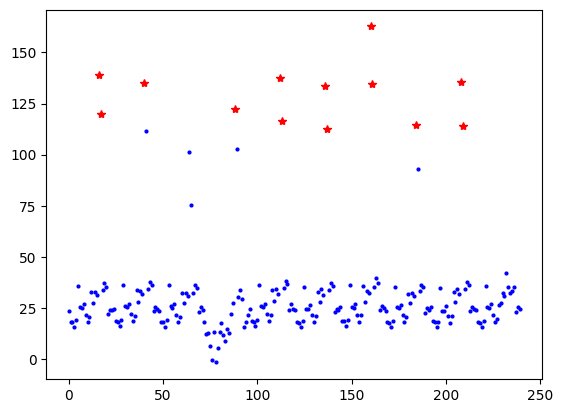

Outliers in column  average_total_lmp_rt  are:  {162.67419018404908, 133.74455172413792, 134.7288036809816, 135.24885326757092, 135.75133016627078, 137.44150442477874, 138.92473532589125, 112.73336206896552, 114.41169117647058, 114.03187648456057, 116.65061946902654, 119.7254159164566, 122.41781725888326}


In [349]:
import matplotlib.pyplot as plt
%matplotlib inline
def detect_outliers (col):
    outliers = set()
    m = col.mean()
    s = col.std()
    for p in col.unique():
        if (abs(p-m) > 3 * s):
            outliers.add(p)
    outliers_indexes = col.isin(outliers)
    plt.plot(col, color='blue', marker='o', ms = 2, linewidth = 0)
    plt.plot(col, color='red', markevery = outliers_indexes, marker='*', ms = 6, linewidth = 0)
    plt.show()
    return outliers

def remove_outliers_from_column(df, col_name):
    col = df[col_name]
    outliers = detect_outliers(col)
    df_cleaned = df[~col.isin(outliers)]
    return outliers, df_cleaned


outliers, windXsolarXloadXlmpNoOutliers = remove_outliers_from_column(windXsolarXloadXlmp, 'average_total_lmp_rt')
print("Outliers in column ", 'average_total_lmp_rt', " are: ", outliers)

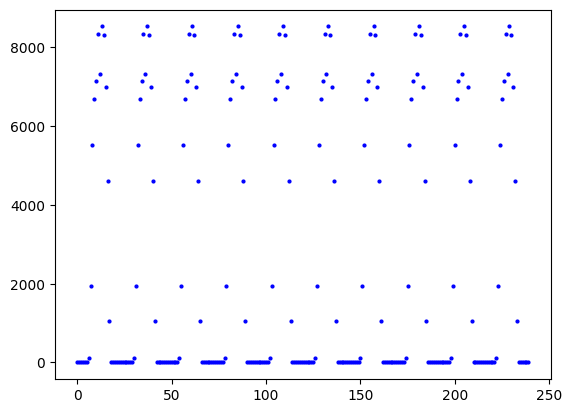

Outliers in column  solar_forecast_mwh  are:  set()


In [350]:
outliers, windXsolarXloadXlmpNoOutliers = remove_outliers_from_column(windXsolarXloadXlmp, 'solar_forecast_mwh')
print("Outliers in column ", 'solar_forecast_mwh', " are: ", outliers)

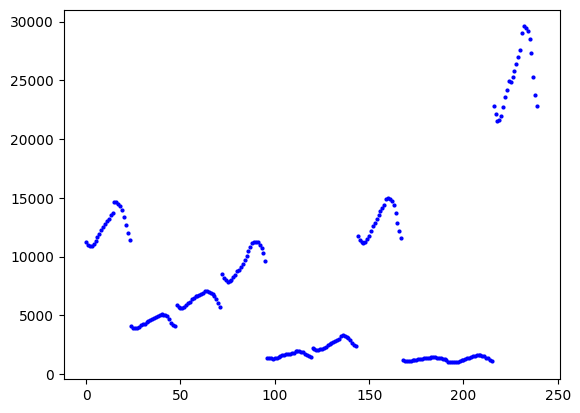

Outliers in column  forecast_load_mw  are:  set()


In [351]:
outliers, windXsolarXloadXlmpNoOutliers = remove_outliers_from_column(windXsolarXloadXlmp, 'forecast_load_mw')
print("Outliers in column ", 'forecast_load_mw', " are: ", outliers)

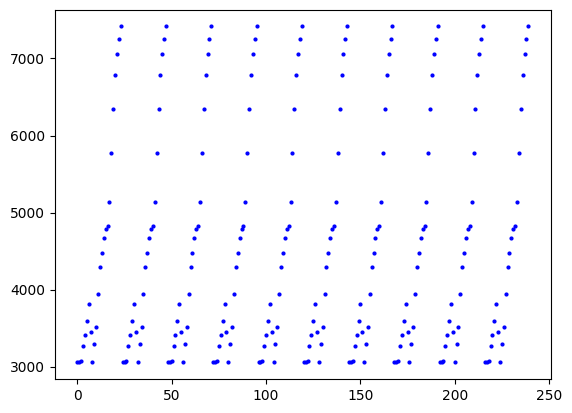

Outliers in column  wind_forecast_mwh  are:  set()


In [352]:
outliers, windXsolarXloadXlmpNoOutliers = remove_outliers_from_column(windXsolarXloadXlmp, 'wind_forecast_mwh')
print("Outliers in column ", 'wind_forecast_mwh', " are: ", outliers)

## Q9 -  Plot a scatter plot of distance and flight air travel time. Describe if there is any correlation between them (Implementation should be in SQL and Pandas). (5 points SQL + 5 points pandas)

Describe and interpret the correlation between the two variables of distance and air travel time.

# Using the Airports Dataset.

In [353]:
windXsolarXloadXlmpNoOutliers

,forecast_area,forecast_load_mw,datetime_beginning_ept,wind_forecast_mwh,solar_forecast_mwh,zone,average_total_lmp_rt
0,AEP,11255,2024-10-05 01:00:00,3056.959,0.000,AEP,23.754797
1,AEP,11010,2024-10-05 02:00:00,3061.729,0.000,AEP,18.124174
2,AEP,10902,2024-10-05 03:00:00,3077.619,0.000,AEP,17.974210
3,AEP,10918,2024-10-05 04:00:00,3273.259,0.000,AEP,15.763806
4,AEP,11069,2024-10-05 05:00:00,3415.707,0.000,AEP,18.986532
...,...,...,...,...,...,...,...
235,METED,28520,2024-10-05 20:00:00,6349.123,0.045,METED,33.109560
236,METED,27315,2024-10-05 21:00:00,6783.092,0.000,METED,35.271429
237,METED,25254,2024-10-05 22:00:00,7060.439,0.000,METED,23.032967
238,METED,23770,2024-10-05 23:00:00,7258.391,0.000,METED,25.362308


In [354]:
columns_to_scale = ['forecast_load_mw', 'wind_forecast_mwh', 'solar_forecast_mwh', 'average_total_lmp_rt']
categorical_columns = ['forecast_area', 'zone']
date_columns = ['datetime_beginning_ept']  # Example date column

# Define transformers
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Function to extract numerical features from dates
def extract_date_features(X):
    # Assuming X is a DataFrame
    X['hour'] = pd.to_datetime(X['datetime_beginning_ept'], errors='coerce').dt.hour
    X['day_of_week'] = pd.to_datetime(X['datetime_beginning_ept'], errors='coerce').dt.dayofweek
    return X[['hour', 'day_of_week']].values

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, columns_to_scale),
        ('cat', encoder, categorical_columns),
        ('date', FunctionTransformer(extract_date_features, validate=False), date_columns)
    ],
    remainder='drop'  # Drop other columns not explicitly transformed
)

# Example DataFrame loading (ensure your DataFrame is loaded here)
# windXsolarXloadXlmpNoOutliers = pd.read_csv('your_data.csv')

# Applying transformations
X_transformed = preprocessor.fit_transform(windXsolarXloadXlmpNoOutliers)

# Getting feature names
num_features = columns_to_scale
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_columns)
date_features = ['hour', 'day_of_week']

# Combine all feature names
all_features = num_features + list(cat_features) + date_features

# Create a DataFrame for the processed data
processed_df = pd.DataFrame(X_transformed, columns=all_features)
processed_df.to_csv('processed_data.csv', index=False)

# Display the processed DataFrame
processed_df

,forecast_load_mw,wind_forecast_mwh,solar_forecast_mwh,average_total_lmp_rt,forecast_area_AEP,forecast_area_APS,forecast_area_ATSI,forecast_area_COMED,forecast_area_DAY,forecast_area_DEOK,...,zone_ATSI,zone_COMED,zone_DAY,zone_DEOK,zone_DOM,zone_DUQ,zone_EKPC,zone_METED,hour,day_of_week
0,0.470996,-1.044225,-0.809999,-0.320870,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
1,0.437467,-1.040906,-0.809999,-0.532608,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
2,0.422686,-1.029852,-0.809999,-0.538248,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
3,0.424876,-0.893742,-0.809999,-0.621369,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0
4,0.445541,-0.794639,-0.809999,-0.500179,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.833787,1.246177,-0.809986,0.030914,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,5.0
236,2.668878,1.548095,-0.809999,0.112211,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,5.0
237,2.386821,1.741049,-0.809999,-0.348014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,5.0
238,2.183729,1.878767,-0.809999,-0.260420,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,5.0
